# This notebook plots the disk usage of both platforms (Figure 3)
## Minerva disk usage is manually calculated via linux platform commands
## Hadoop HDFS disk usage is derived from HDFS ls command
### @require:  hdfs_disk_usage folder

In [2]:
import pandas as pd

In [7]:
##### Manually calculated Minerva disk usage
dns =['pf1','pf2','pf3','elegans','pacificus','remanei','drosophila','thaliana']
# intermediate file usage = (all disk usage) - (raw data usage)
sizes = [54-7.4,54-7.4,53-7.4,493.6-107,738.4-169,729-170,746.6-171,760.4-171]
out_dfs = pd.DataFrame(index=range(len(dns)))
out_dfs['data']=dns
out_dfs['disk usage'] = sizes
out_dfs['#processors'] = 24
out_dfs['platform']='Minerva'
dfs =[out_dfs]
#### Automatically get the disk usage of HDFS
for dn in dns:
    for n in [1,2,4,8,16,24]:
        fn = 'final_results/hdfs_disk_usage/%s_n%d_disk_usage.txt' %(dn,n)
        usage = 0
        with open(fn, "r") as f:
            for line in f:
                du = float(line.split()[4])
                usage += du
        usage = usage/1000000.0 # byte to megabyte
        out_df = pd.DataFrame(data=[[dn,n,usage,'Demeter']],columns=['data','#processors','disk usage','platform'],index=[0])
        dfs.append(out_df)   
dfs = pd.concat(dfs)
dfs['disk usage'] = dfs['disk usage']/1000.0 # megabyte to gigabyte

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

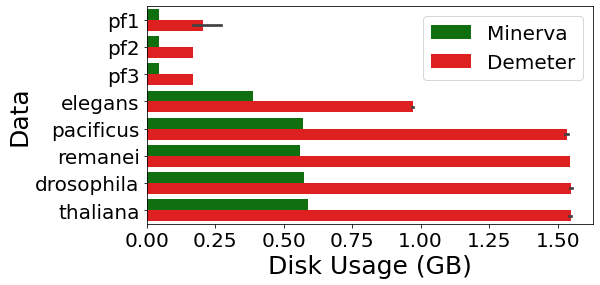

In [16]:
# sns.set(style="whitegrid")
fig = plt.figure(figsize=(8,4))
f = sns.barplot(data=dfs,x='disk usage',hue_order=['Minerva','Demeter'],y='data',hue='platform',
                orient="h", palette=['green','red'])
plt.ylabel('Data',fontsize=25)
plt.xlabel('Disk Usage (GB)',fontsize=25)
plt.tick_params(axis='both',labelsize=20)
plt.legend(fontsize=20)
plt.savefig('Figure3_disk_usage.pdf',bbox_inches='tight', dpi=300)
plt.show()
plt.close()